In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat

ModuleNotFoundError: No module named 'bioinfokit'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataframe = pd.read_csv('SwimmingTimes.csv',encoding='latin-1')

In [4]:
dataframe.head()

,Category,Name,Time
0,Backstroke,SonneleOeztuerk,133.97
1,Backstroke,AnastasyaGorbenko,131.46
2,Backstroke,CamilaRodriguesRebelo,131.05
3,Backstroke,DoraMolnar,129.88
4,Backstroke,KatieShanahan,129.82


In [5]:
#Checking null values in dataframe
dataframe.isnull().sum()

Category    0
Name        0
Time        0
dtype: int64

In [6]:
df_backstroke  =  dataframe[dataframe['Category'] == 'Backstroke']
df_breaststroke = dataframe[dataframe['Category'] == 'Breaststroke']
df_butterfly  =  dataframe[dataframe['Category'] == 'Butterfly']
df_freestyle  =  dataframe[dataframe['Category'] == 'Freestyle']
df_medley  =  dataframe[dataframe['Category'] == 'Medley']

In [7]:
####################################### Task1 #########################################

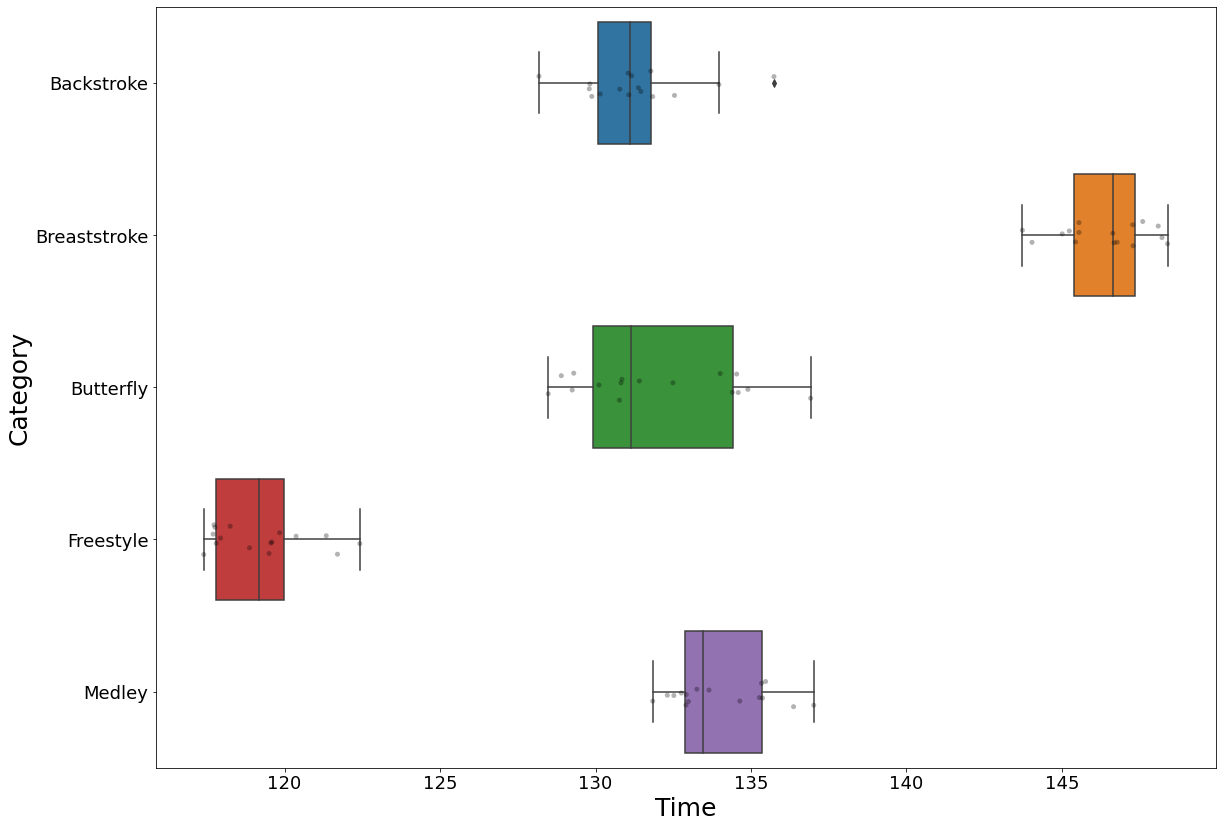

In [8]:
plt.figure(figsize=(19,14))
sns.boxplot(y="Category", x="Time", data=dataframe)
sns.stripplot(y="Category", x="Time", color='black',alpha=0.3,data=dataframe)
plt.ylabel("Category", size=25)
plt.yticks(fontsize=18)
plt.xlabel("Time", size=25)
plt.xticks(fontsize=18)
plt.savefig('boxplot.pdf')

In [9]:
print("variance: %f" % df_backstroke['Time'].var())
print("variance: %f" % df_breaststroke['Time'].var())
print("variance: %f" % df_butterfly['Time'].var())
print("variance: %f" % df_freestyle['Time'].var())
print("variance: %f" % df_medley['Time'].var())

variance: 3.123380
variance: 2.119130
variance: 6.720865
variance: 2.507426
variance: 2.524133


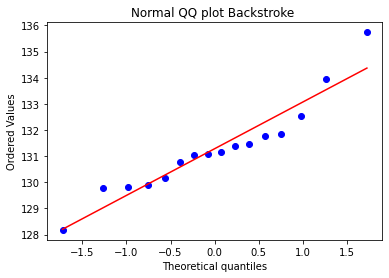

In [10]:
import scipy.stats as stats
stats.probplot(df_backstroke["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Backstroke ")
plt.savefig('QQ-Backstroke.pdf')
plt.show()

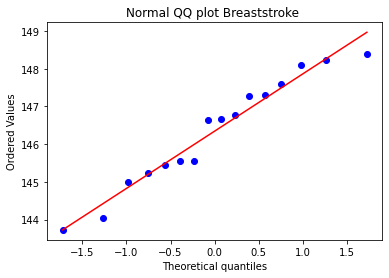

In [11]:
import scipy.stats as stats
stats.probplot(df_breaststroke["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Breaststroke ")
plt.savefig('QQ-breaststroke.pdf')
plt.show()

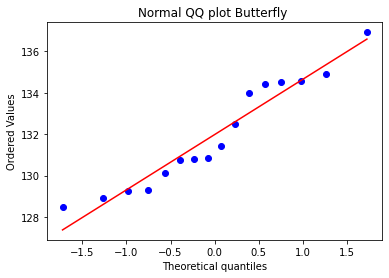

In [12]:
import scipy.stats as stats
stats.probplot(df_butterfly["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Butterfly ")
plt.savefig('QQ-Butterfly.pdf')
plt.show()

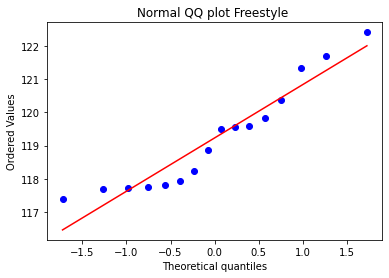

In [13]:
import scipy.stats as stats
stats.probplot(df_freestyle["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Freestyle ")
plt.savefig('QQ-Freestyle.pdf')
plt.show()

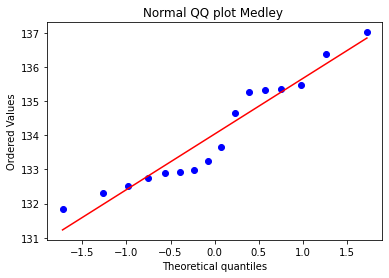

In [14]:
import scipy.stats as stats
stats.probplot(df_medley["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Medley ")
plt.savefig('QQ-Medley.pdf')
plt.show()

In [15]:
res = stat()
res.anova_stat(df=dataframe, res_var='Time', anova_model='Time ~ C(Category)')
res.anova_summary[["df","F","PR(>F)"]]

ModuleNotFoundError: No module named 'bioinfokit'

In [ ]:
####################################### Task2 #########################################

In [ ]:
 ####################################### Two Sample t-test #############################
    
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
   
comp = MultiComparison(dataframe['Time'], dataframe['Category'])
tbl, a1, a2 = comp.allpairtest(ttest_ind,method="bonf",alpha = 0.05)
tbl

group1,group2,stat,pval,pval_corr,reject
Backstroke,Breaststroke,-26.3086,0.0,0.0,True
Backstroke,Butterfly,-0.8876,0.3818,1.0,False
Backstroke,Freestyle,20.3156,0.0,0.0,True
Backstroke,Medley,-4.633,0.0001,0.0007,True
Breaststroke,Butterfly,19.3234,0.0,0.0,True
Breaststroke,Freestyle,50.4174,0.0,0.0,True
Breaststroke,Medley,22.8453,0.0,0.0,True
Butterfly,Freestyle,16.7859,0.0,0.0,True
Butterfly,Medley,-2.7051,0.0111,0.1115,False
Freestyle,Medley,-26.3997,0.0,0.0,True


In [ ]:
######################## FWER without Bonferroni Correction #
Significance_value = 0.05
number_of_comparisons = 10

FWER = 1-(1-Significance_value)**number_of_comparisons
print("FWER = ",FWER)

FWER =  0.4012630607616213


In [ ]:
df = pd.DataFrame(tbl,columns=["group1","group2","stat","pval","pval_corr","reject_corr"])
df = df.iloc[1:]
df['reject'] = df['pval'].astype(str) <= str(0.05)
print("Multiple Comparison t-test Significance_value=0.05 FWER=0.26 method=bonf NEW_FWER=0.05, Adjusted_Significance_value=0.003")
df

Multiple Comparison t-test Significance_value=0.05 FWER=0.26 method=bonf NEW_FWER=0.05, Adjusted_Significance_value=0.003


,group1,group2,stat,pval,pval_corr,reject_corr,reject
1,Backstroke,Breaststroke,-26.3086,0.0,0.0,True,True
2,Backstroke,Butterfly,-0.8876,0.3818,1.0,False,False
3,Backstroke,Freestyle,20.3156,0.0,0.0,True,True
4,Backstroke,Medley,-4.633,0.0001,0.0007,True,True
5,Breaststroke,Butterfly,19.3234,0.0,0.0,True,True
6,Breaststroke,Freestyle,50.4174,0.0,0.0,True,True
7,Breaststroke,Medley,22.8453,0.0,0.0,True,True
8,Butterfly,Freestyle,16.7859,0.0,0.0,True,True
9,Butterfly,Medley,-2.7051,0.0111,0.1115,False,True
10,Freestyle,Medley,-26.3997,0.0,0.0,True,True
